1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [26]:
def hexDigit(num):
    if num < 10:
        return num
    elif num == 10:
        return("A")
    elif num == 11:
        return("B")
    elif num == 12:
        return("C")
    elif num == 13:
        return("D")
    elif num == 14:
        return("E")
    elif num == 15:
        return("F")
    
def revHexDigit(num):
    if num == "A":
        return(10)
    elif num == "B":
        return(11)
    elif num == "C":
        return(12)
    elif num == "D":
        return(13)
    elif num == "E":
        return(14)
    elif num == "F":
        return(15)
    elif int(num) < 10:
        return int(num)
    
def decToHex(num):
    numOut = []
    if num == 0:
        numOut.append(0)
    while num >= 1:
        numOut.insert(0, hexDigit(num % 16))
        num //= 16
    numOut = ''.join(str(d) for d in numOut)
    return numOut
        
def decToBin(num):
    numOut = []
    if num == 0:
        numOut.append(0)
    while num >= 1:
        numOut.insert(0, num % 2)
        num //= 2
    numOut = ''.join(str(d) for d in numOut)
    return numOut
    
def binToDec(num):
    numOut = 0
    for id, i in enumerate(num):
        numOut += int(i) * 2**(len(num) - id - 1)
    return numOut

def hexToDec(num):
    numOut = 0
    for id, i in enumerate(num):
        numOut += int(revHexDigit(i)) * 16**(len(num) - id - 1)
    return numOut

def conv(num, BaseIn, BaseOut):
    if BaseIn == "dec":
        if BaseOut == "bin":
            numOut = decToBin(num)
        if BaseOut == "hex":
            numOut = decToHex(num)
    
    if BaseIn == "bin":
        num = str(num)
        if BaseOut == "dec":
            numOut = binToDec(num)
        if BaseOut == "hex":
            numOut = decToHex(binToDec(num))
            
    if BaseIn == "hex": #doesn't work
        num = str(num)
        if BaseOut == "dec":
            numOut = hexToDec(num)
        if BaseOut == "bin":
            numOut = decToBin(hexToDec(num))
            
                
    return numOut

#use a string for hexadecimal
a = "B"
print(conv(a,"hex","bin"))

1011


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [52]:
def float_conv(word):
    """Converts a 32 bit word into a single precision floating point"""
    
    bias = 0b1111111
    mntMask = 0b00000000011111111111111111111111
    expMask = 0b01111111100000000000000000000000
    sgnMask = 0b10000000000000000000000000000000
    
    sgn = (sgnMask & word)>>31
    exp = ((expMask & word)>>23) - bias
    mnt = (mntMask & word)
    
    #special cases
    if exp + bias == 255:
        if mnt == 0:
            if sgn == 0:
                return("+inf")
            else: return("-inf")
        else: return("NaN")
    
    #calculate mantissa
    mntMaskLoop = 0b1
    mntLoop = 0b1
    for i in range(23):
        mntLoop += ((mntMaskLoop & word)>>i) * 2**(-(23-i))
        mntMaskLoop <<= 1
    
    wordOut = ((-1)**sgn)*mntLoop*2**exp
    return(wordOut)

word = 0b01111111100000000000000000000000

print(float_conv(word))

+inf


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [94]:
import math

testOF = 1.
while True:
    testOF1 = testOF*2
    if math.isinf(testOF1):
        print("Overflow limit:", testOF)
        break
    testOF = testOF1
    
testUF = 1.
while True:
    testUF1 = testUF/2
    if testUF1 == 0.:
        print("Underflow limit:", testUF)
        break
    testUF = testUF1

Overflow limit: 8.98846567431158e+307
Underflow limit: 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [98]:
testPrec = 1.
i = 1.
while testPrec != testPrec+i:
    i /= 2

print("Machine precision:",i)

Machine precision: 1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [22]:
def quadratic_a(a, b, c): #better x2 solution if b^2 >> 4ac
    r = (b**2 - 4*a*c)**0.5
    x1 = (-b + r) / (2*a)
    x2 = (-b - r) / (2*a)
    return(x1, x2)

def quadratic_b(a, b, c): #better x1 solution if b^2 >> 4ac
    r = (b**2 - 4*a*c)**0.5
    x1 = (2*c) / (-b - r)
    x2 = (2*c) / (-b + r)
    return(x1, x2)

def quadratic(a, b, c):
    r = (b**2 - 4*a*c)**0.5
    x1 = (2*c) / (-b - r)
#     x2 = c / (x1*a)
    x2 = (-b - r) / (2*a)
    return(x1, x2)

x1,x2=quadratic_a(0.001,1000,0.001)
y1,y2=quadratic(0.001,1000,0.001)

print(quadratic_a(0.001,1000,0.001))
print(quadratic_b(0.001,1000,0.001))
print(quadratic(0.001,1000,0.001))

# print(0.001*x2**2+1000*x2+0.001)

(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)
(-1.000000000001e-06, -999999.999999)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

True value of f'(1): 1
Values computed numericalli:
delta	f'(1)
0.01	1.010000000000001
0.0001	1.0000999999998899
1e-06	1.0000009999177333
1e-08	1.0000000039225287
1e-10	1.000000082840371
1e-12	1.0000889005833413
1e-14	0.9992007221626509


<function matplotlib.pyplot.show(close=None, block=None)>

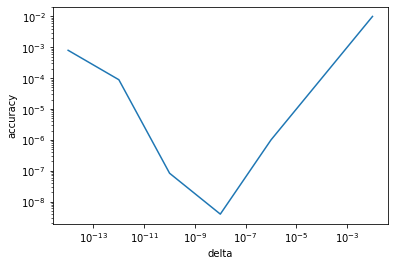

In [50]:
# f(x)  = x(x - 1)
# f'(x) = 2x - 1
# f'(1) = 1

def f(x):
    return x*(x-1)

def der(x0, delta):
    return (f(x0 + delta) - f(x0))/delta

print("True value of f'(1): 1")
print("Values computed numericalli:")
print("delta\tf'(1)")
x = [10**-i for i in range(2,15,2)]
y = [der(1,x0) for x0 in x]

for i in range(len(x)):
    print(x[i],y[i],sep="\t")
    
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x,np.abs(np.array(y)-1))
plt.xscale("log")
plt.yscale("log")
plt.ylabel("accuracy")
plt.xlabel("delta")
plt.show
#there's a max accuracy for delta = 10^-8

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [65]:
import math

def f(x):
    return (1 - x**2)**0.5

def riemann(N):
    h = 2/N
    I = 0
    for k in range(N):
        I += f(k*h-1)
    I *= h
    return(I)

print("True result of I:",math.pi/2)
print("Result computed numerically:",riemann(1000000))
# if N = 2'400'000 the execution time is ~1.02 s

True result of I: 1.5707963267948966
Result computed numerically: 1.5707963251319348


In [76]:
%timeit riemann(2400000)

1.02 s ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
